In [161]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

In [162]:
hbar = sc.physical_constants['reduced Planck constant in eV s'][0]
m_e = sc.physical_constants['electron mass energy equivalent'][0]
l = 10E-9 # m
v = 1

In [163]:
# T = lambda e: 16*e*(v-e)/v**2 * np.exp(-2*l/hbar*np.sqrt(2*m_e*(v-e)))
T_l = lambda e_: (1 + (v**2 * np.sinh(l*np.sqrt(2*m_e*(v-e_))/hbar)**2)/(4*e_*(v-e_)))**-1
T_eq = lambda e_: (1 + m_e*l**2 * v / (2*hbar**2))**-1
T_g = lambda e_: (1 + (v**2 * np.sin(l*np.sqrt(2*m_e*(e_-v))/hbar)**2)/(4*e_*(e_-v)))**-1

In [164]:
n = 100
es_lv = np.linspace(0, v*((n-1)/n), n-1)
es_gv = np.linspace(v*((n+1)/n), v*3, n*2)
es = np.append(es_lv, v)
es = np.concatenate((es, es_gv))

In [165]:

leq = np.append(T_l(es_lv), T_eq(v))
Ts = np.concatenate((leq, T_g(es_gv)))

/home/fangchenli/miniconda3/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


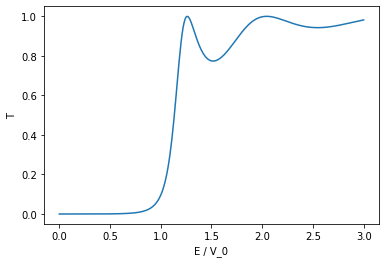

In [166]:
es_v = es / v
plt.plot(es_v, Ts)
plt.xlabel('E / V_0')
plt.ylabel('T')
plt.show()

In [ ]:
vs = np.linspace(0, 20, 100)
I = lambda v_: 2*sc.e**2/hbar * v_ * T_g()
